## Sobre a Base de Dados: Diabetes¹
A base possui dados gerais e resultado exames de pacientes mulheres com pelo menos 21 anos de herança indiana pima.

Atributos
- Número de gravidezes
- Concentração de glicose plasma a 2 horas em um teste oral de tolerância à glicose
- Pressão sanguínea diastólica (mm Hg)
- Espessura da dobra da pele do tríceps
- 2-Horas de insulina sérica (mu U/ml)
- Índice de massa corporal (peso em kg ➗ (altura em m)²)
- Função de pedigree da diabetes
- Idade
- Label (0 or 1)
---
¹ https://www.kaggle.com/uciml/pima-indians-diabetes-database


## Tarefas
- Caso ainda não tenha, cadastre-se no site kaggle.com
- Faça o download do dataset: https://www.kaggle.com/uciml/pima-indians-diabetes-database
---

## Lendo arquivo externo

In [1]:
# Biblioteca para operações em arquivos locais
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [2]:
import pandas as pd
df = pd.read_csv('diabetes.csv')
df.head()

,numero_gravidezes,concentracao_glicose,pressao_sanguinea,espessura_triceps,insulina_serica,massa_corporal,funcao_diabetes,idade,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Modelo Supervisionado

### Exemplo de função de avaliação

$Acurácia = \frac{Verdadeiro\ Positivo\ +\ Verdadeiro\ Negativo}{Total\ de\ Registros}$

In [0]:
# Exemplo de função de avaliação
def accuracy(y_real, y_pred):
  return sum(y_real == y_pred) / len(y_real)

### Regressão Logística

In [4]:
# Importa modelo linear de classificação
from sklearn.linear_model import LogisticRegression

# Extrai features e rótulos do dataframe
X = df.drop('label', axis=1).as_matrix()
y = df['label'].as_matrix()

# Instancia e treina o modelo de classificação
model = LogisticRegression().fit(X, y)

# Prediz valores
y_predito = model.predict(X)

# Avaliando modelo
print(accuracy(y, y_predito))

0.7760416666666666


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Árvore de Decisão

In [6]:
# Vamos usar o mesmo dataset, agora para enteder o funcionamento do algoritmo
## Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Cria modelo de classificação
model = DecisionTreeClassifier().fit(X, y)

# Prediz valores
y_predito = model.predict(X)

# Avaliando modelo de decision tree
print(accuracy(y, y_predito))

1.0


In [0]:
# Vamos printar a nossa árvore de decisão para ficar mais claro o funcionamento

# Import de algumas libs necessárias
from IPython.display import Image
from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz
import pydotplus

# Criando local de escrita para arquivo temporário
dot_data = StringIO()

# Usando função do sklearn para exportar a árvore
export_graphviz(model, out_file=dot_data, filled=True, rounded=True,
                special_characters=True)

# Gerando visualização no IPython Notebook
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Complexo, não é mesmo? rsrs

## Modelo Não Supervisionado

In [0]:
# Vamos usar um algoritmo de redução de dimensionalidade para tentar visualizar
# melhor o conjunto de features. Para isso, optamos por exemplificar usando PCA
from sklearn.decomposition import PCA

# Extrai features e rótulos do dataframe
X = df.drop('label', axis=1).values
y = df['label'].values

# Cria modelo e transforma os valores das features em 2 dimensões
X2 = PCA(2).fit_transform(X)

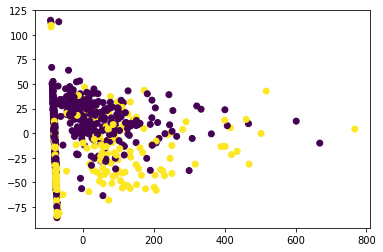

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

# Gráfico
plt.scatter(X2[:,0], X2[:,1], c=y)